# Guided Practice: Multiple Regression Analysis using citi bike data 

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
from sklearn import linear_model, metrics

import statsmodels.api as sm

%matplotlib inline

bike_data = pd.read_csv('https://github.com/ga-students/DAT-NYC-37/raw/master/lessons/lesson-07/assets/dataset/bikeshare.csv')
bike_data.head()

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,0,6,0,1,0.24,0.2879,0.81,0.0,3,13,16
1,2,2011-01-01,1,0,1,1,0,6,0,1,0.22,0.2727,0.80,0.0,8,32,40
2,3,2011-01-01,1,0,1,2,0,6,0,1,0.22,0.2727,0.80,0.0,5,27,32
3,4,2011-01-01,1,0,1,3,0,6,0,1,0.24,0.2879,0.75,0.0,3,10,13
4,5,2011-01-01,1,0,1,4,0,6,0,1,0.24,0.2879,0.75,0.0,0,1,1


### Review! Distributions:

-0.00602088334827
-0.94184420407


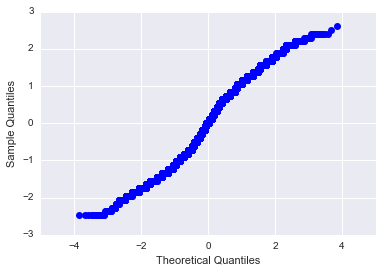

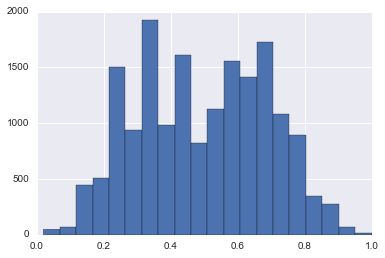

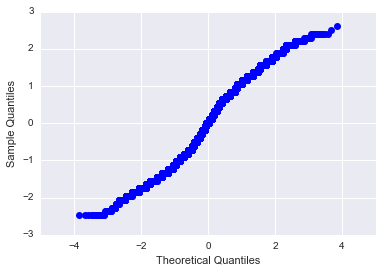

In [2]:
print bike_data['temp'].skew()
print bike_data['temp'].kurt()

bike_data['temp'].hist(bins=20)
sm.qqplot(bike_data['temp'], fit=True)

![QQ plot types](http://i.stack.imgur.com/ZXRkL.png)

There can be a similar effect from a feature set that is a singular matrix, which is when there is a clear relationship in the matrix (for example, the sum of all rows = 1).

### Run through the following code on your own.
#### What happens to the coefficients when you include all weather situations instead of just including all except one?

In [ ]:
from sklearn import feature_selection, linear_model

# From last class...
def get_linear_model_metrics(X, y):
    
    # *TODO* 1: Describe in your words
    model = linear_model.LinearRegression()   # Specify the model
    pvals = feature_selection.f_regression(X, y)[1]  # Defining the model
    # get the pvalue of X given y. Ignore f-stat for now.
    
    # *TODO*: Describe in your words
    
    # start with an empty linear regression object
    # .fit() runs the linear regression function on X and y
    model.fit(X, y)

    residuals = (y - model.predict(X)).values

    # print the necessary values
    # *TODO*: Describe in your words
    print 'P Values:', pvals
    print 'Coefficients:', model.coef_
    print 'y-intercept:', model.intercept_
    print 'R-Squared:', model.score(X,y)
    print
    
    # keep the model
    return model

In [ ]:
y = bike_data['casual']

lm = linear_model.LinearRegression()
weather = pd.get_dummies(bike_data.weathersit)

get_linear_model_metrics(weather[[1, 2, 3, 4]], y)

# Set one weather as the reference (drop it), weather situation  = 4
get_linear_model_metrics(weather[[1, 2, 3]], y)

# Building a model to predict guest ridership
With a partner, complete this code together and visualize the correlations of all the numerical features built into the data set.

We want to:
- Id categorical variables
- Create dummies (weather situation is done for you in the starter code)
- Find at least two more features that are not correlated with current features, but could be strong indicators for predicting guest riders.

In [ ]:
# Hint: use sns.heatmap or sns.pairplot(df) to explore your variable relationships!

In [60]:
bikemodel_data['registered'].head()

0    13
1    32
2    27
3    10
4     1
Name: registered, dtype: int64

In [11]:
workday.columns

Int64Index([0, 1], dtype='int64')

Index([u'instant', u'dteday', u'season', u'yr', u'mnth', u'hr', u'holiday',
       u'weekday', u'workingday', u'weathersit', u'temp', u'atemp', u'hum',
       u'windspeed', u'casual', u'registered', u'cnt', u'weather_1',
       u'weather_2', u'weather_3', u'weather_4', u'notworkday', u'workday',
       u'season_1', u'season_2', u'season_3', u'season_4'],
      dtype='object')
                temp  weather_1  weather_2  weather_3  windspeed   workday  \
temp        1.000000   0.101044  -0.069657  -0.062406  -0.023125  0.055390   
weather_1   0.101044   1.000000  -0.822961  -0.412414   0.005150 -0.041633   
weather_2  -0.069657  -0.822961   1.000000  -0.177417  -0.049241  0.024960   
weather_3  -0.062406  -0.412414  -0.177417   1.000000   0.070018  0.032155   
windspeed  -0.023125   0.005150  -0.049241   0.070018   1.000000 -0.011830   
workday     0.055390  -0.041633   0.024960   0.032155  -0.011830  1.000000   
season_2    0.144363  -0.010150  -0.002648   0.022216   0.063447  0.015879 

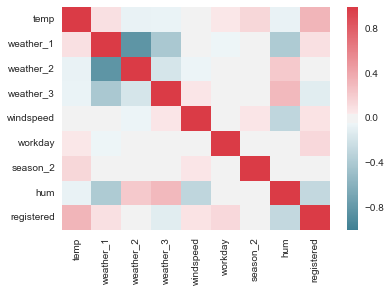

In [64]:
# Sample starter code (hints!)

#Dummies example: 
weather = pd.get_dummies(bike_data.weathersit)
workday = pd.get_dummies(bike_data.workingday)
seasons = pd.get_dummies(bike_data.season)

#create new names for our new dummy variables
weather.columns = ['weather_' + str(i) for i in weather.columns]
workday.columns = ['notworkday', 'workday' ]
seasons.columns = ['season_' + str(i) for i in seasons.columns]

#join those new variables back into the larger dataset
bikemodel_data = bike_data.join([weather, workday, seasons])
print bikemodel_data.columns

#Select columns to keep. Don't forget to set a reference category for your dummies (aka drop one)
columns_to_keep = ['temp', 'weather_1', 'weather_2', 'weather_3', 'windspeed', 'workday', 
                   'season_2', 'hum', 'registered'] #[which_variables?]

#checking for colinearity
cmap = sns.diverging_palette(220, 10, as_cmap=True)
correlations = bikemodel_data[columns_to_keep].corr()# what are we getting the correlations of?
all_col = bikemodel_data.corr()

print correlations
print sns.heatmap(correlations, cmap=cmap)

## Independent Practice: Building model to predict guest ridership 


#### Pay attention to:
* Which variables would make sense to dummy (because they are categorical, not continuous)? 
* the distribution of riders (should we rescale the data?)  
* checking correlations with variables and guest riders  
* having a feature space (our matrix) with low multicollinearity  
* the linear assumption -- given all feature values being 0, should we have no ridership? negative ridership? positive ridership?
* What features might explain ridership but aren't included in the data set? 

### You're done when:  
If your model has an r-squared above .4, this a relatively effective model for the data available. Kudos! Move on to the bonus!

In [62]:
# your code here...
from sklearn import feature_selection, linear_model

def linear_model_reg(X, y):
    model = linear_model.LinearRegression()
    pvals = feature_selection.f_regression(X, y)[1]
    
    model.fit(X, y)
    
    residuals = (y - model.predict(X)).values
    
    print 'P Values: ', pvals
    print 'Coeff: ', model.coef_
    print 'Y-intercept: ', model.intercept_
    print 'R^2: ', model.score(X, y)
    print
    
    return model

In [63]:
linear_model_reg(bikemodel_data[columns_to_keep], bikemodel_data['casual'])

P Values:  [  0.00000000e+00   3.75616929e-73   3.43170021e-22   1.57718666e-55
   8.66781628e-33   0.00000000e+00   1.70941845e-60   0.00000000e+00
   0.00000000e+00]
Coeff:  [ 84.0574785  -21.42343852 -18.24050893 -15.22209564  -4.54332418
 -39.23729474   7.92125153 -59.48662468   0.12577081]
Y-intercept:  57.5939155715
R^2:  0.540158970278



LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

#### 1: What's the strongest predictor? 

Answer: temperature, given its coefficient of 115 and p value of 0. no other predictor comes to this absolute magnitude

#### 2: How well did your model do? 

Answer: pretty well. R^2 is slightly greater than 0.4

#### 3: How can you improve it? 

Answer: adding 'registered' returned a value above .5!

### Bonus:
    
We've completed a model that explains casual guest riders. Now it's your turn to build another model, using a different y (outcome) variable: registered riders.

**Bonus 1:** What's the strongest predictor? 

In [87]:
bikemodel_data.columns

Index([u'instant', u'dteday', u'season', u'yr', u'mnth', u'hr', u'holiday',
       u'weekday', u'workingday', u'weathersit', u'temp', u'atemp', u'hum',
       u'windspeed', u'casual', u'registered', u'cnt', u'weather_1',
       u'weather_2', u'weather_3', u'weather_4', u'notworkday', u'workday',
       u'season_1', u'season_2', u'season_3', u'season_4'],
      dtype='object')

In [88]:
model2_cols = ['temp', 'weather_1', 'weather_3', 'windspeed', 'workday', 'hr',
                   'season_2', 'hum', 'cnt']

In [89]:
corr2 = bikemodel_data[model2_cols].corr()

In [90]:
print corr2

               temp  weather_1  weather_3  windspeed   workday        hr  \
temp       1.000000   0.101044  -0.062406  -0.023125  0.055390  0.137603   
weather_1  0.101044   1.000000  -0.412414   0.005150 -0.041633  0.036999   
weather_3 -0.062406  -0.412414   1.000000   0.070018  0.032155  0.016963   
windspeed -0.023125   0.005150   0.070018   1.000000 -0.011830  0.137252   
workday    0.055390  -0.041633   0.032155  -0.011830  1.000000  0.002285   
hr         0.137603   0.036999   0.016963   0.137252  0.002285  1.000000   
season_2   0.144363  -0.010150   0.022216   0.063447  0.015879 -0.002919   
hum       -0.069881  -0.383425   0.309737  -0.290105  0.015688 -0.276498   
cnt        0.404772   0.117478  -0.128034   0.093234  0.030284  0.394071   

           season_2       hum       cnt  
temp       0.144363 -0.069881  0.404772  
weather_1 -0.010150 -0.383425  0.117478  
weather_3  0.022216  0.309737 -0.128034  
windspeed  0.063447 -0.290105  0.093234  
workday    0.015879  0.015688

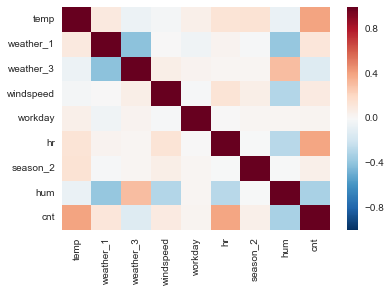

In [91]:
sns.heatmap(corr2)

In [92]:
linear_model_reg(bikemodel_data[model2_cols], bikemodel_data['registered'])

P Values:  [  0.00000000e+000   4.43016006e-037   4.73056490e-052   1.60231470e-027
   8.83608168e-071   0.00000000e+000   1.99995088e-005   1.01368000e-296
   0.00000000e+000]
Coeff:  [ -5.99424411e+01   2.03456144e+00  -3.40329051e+00   5.22295484e+00
   3.50468066e+01  -5.89937501e-02  -6.99873615e+00   4.10013325e+01
   8.48611678e-01]
Y-intercept:  -26.4418560526
R^2:  0.963255220124



LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

**Bonus 2:** How well did your model do? 

**Bonus 3:** How can you improve it? 

### Additional Resources:

- Good explanation of when to apply log scaling: http://stats.stackexchange.com/a/28007